In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'/Users/sot/Documents/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [5]:
df = df.drop('CustomerID',axis = 1)

In [6]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


###### i will be taking the annual income and spending score features to spot patterns and get a better visualization of  customers

In [7]:
data = df[['Annual Income (k$)','Spending Score (1-100)']]

In [8]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# EDA 

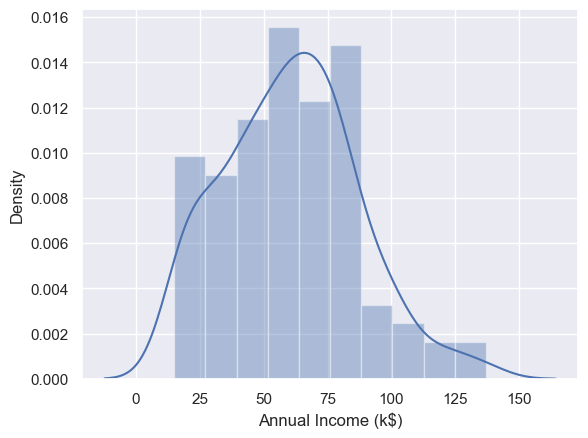

In [9]:
sns.distplot(data['Annual Income (k$)'],kde = 1000 );

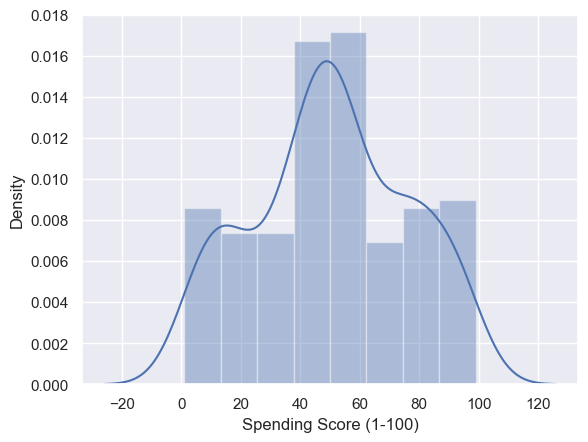

In [10]:
sns.distplot(data['Spending Score (1-100)'],kde = 1000 );

### DATA PREPROCESSING

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [13]:
## check null value

data.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# KMEANS CLUSTERING

In [14]:
from sklearn.cluster import KMeans

#### Using KMeans to spot the optimal number of clusters

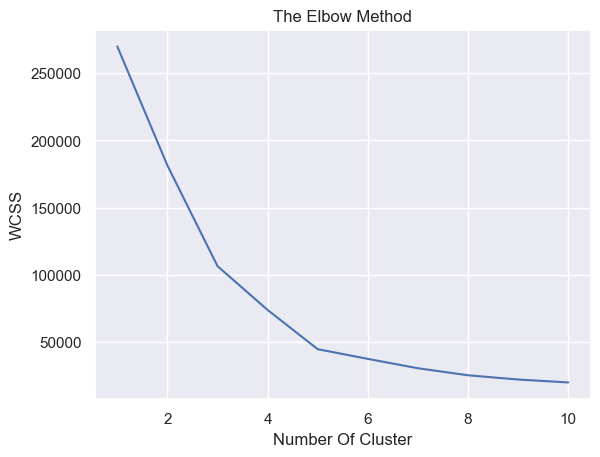

In [15]:
wcss = []

for i in range(1,11):
    kmeans=  KMeans(i,init = 'k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Cluster')
plt.ylabel('WCSS')
plt.show()
    

In [16]:
kmeans=  KMeans(5,init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(data)

In [17]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [18]:
data = data.values

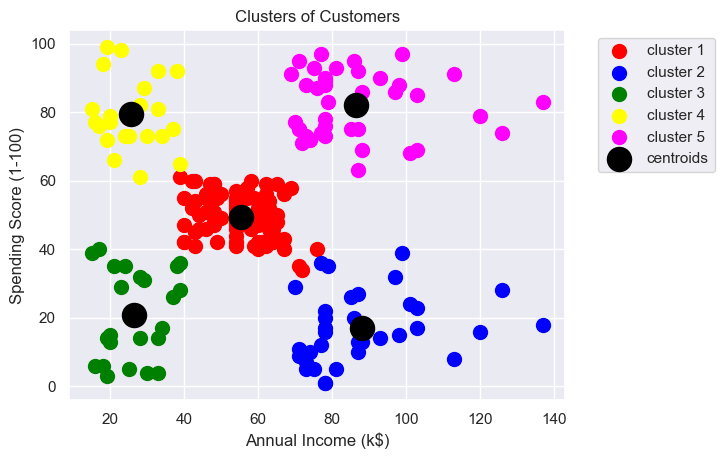

In [19]:

plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=100, c='red', label='cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=100, c='blue', label='cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s=100, c='green', label='cluster 3')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s=100, c='yellow', label='cluster 4')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s=100, c='magenta', label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## INSIGHTS AND RECOMMENDATION

###### CLUSTER 1: This group tends to spend moderately, possibly indicating balanced budgeting and conscious spending. They may be interested in mid-range products and promotions. Marketing strategies like targeted discounts or loyalty programs could encourage them to increase spending without breaking their budget.

###### CLUSTER 2: These customers have significant income but are currently spending less. This could mean they are either saving or not seeing the value in the offerings. This cluster represents a missed opportunity. Strategies to better engage these customers might include personalized marketing, exclusive offers, or highlighting premium services and products to better align with their income level.

###### CLUSTER 3: This group has limited income and also spends less, likely due to budget constraints. Consider offering discounts, budget-friendly products, or value bundles to appeal to this cluster. Understanding what drives their purchasing decisions—such as necessity or value for money—will be crucial.

###### CLUSTER 4: Despite their low income, they are spending significantly, possibly on products that they perceive as necessary or luxury items that stretch their budget. This segment may be susceptible to over-extending financially. To retain them, focus on highlighting affordable luxury options and value-for-money purchases. They may also benefit from credit or payment installment options to better align their spending power with available products.

###### CLUSTER 5: This group has high income and also tends to spend a lot, making them a prime target for premium offerings. You can offer them exclusive products, loyalty benefits, premium subscriptions, and luxury experiences to ensure they feel valued. Upselling and cross-selling opportunities could also be effective since they have the disposable income to spend.


## cluster 5 customers are top premium customers and should be valued. cluster 2 are premium but spending so low. Personalization, value demonstration, exclusive benefits, and targeted engagement that aligns with their lifestyle and preferences could turn cluster 2 customers to cluster 5 customers

# HIERARHICAL CLUSTERING 

In [20]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [21]:
dff = df[['Age','Spending Score (1-100)']]

In [22]:
dff.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


## Using dendrogram to check for optimal number of clusters

In [23]:
from scipy.cluster import hierarchy as sch

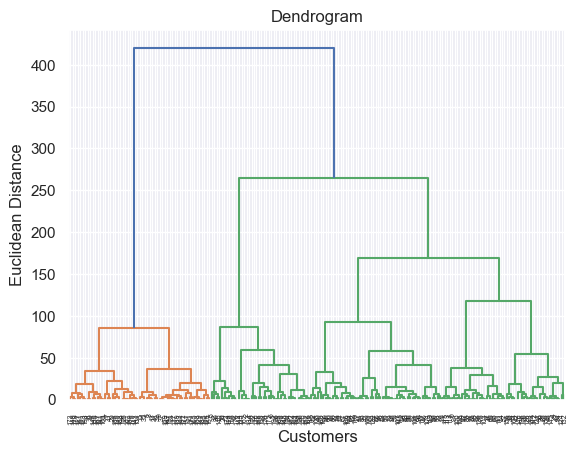

In [24]:
dendrogram = sch.dendrogram(sch.linkage(dff,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

####  from the dendrogram, it is evident that the optimal number of clusters is 2... 2 clusters have the longest distance in movement from the point of the horizontal to the other horizontal.

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
hc =  AgglomerativeClustering(2,affinity ='euclidean',linkage = 'ward')

In [27]:
y_hc = hc.fit_predict(dff)

In [28]:
y_hc

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [29]:
dff = dff.values

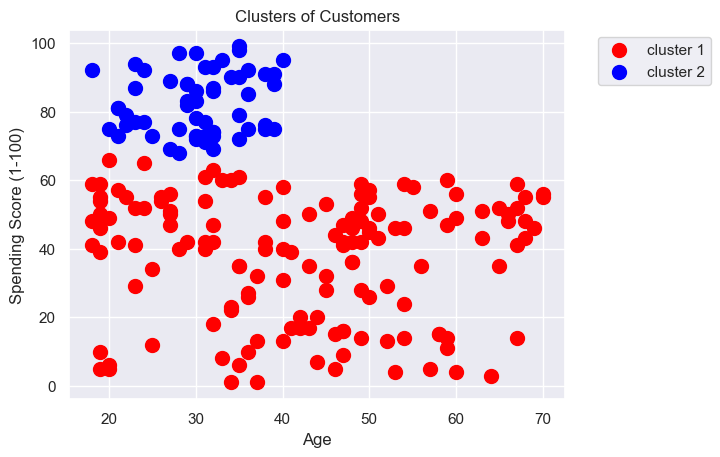

In [30]:
# Plotting the clusters
plt.scatter(dff[y_hc == 0, 0], dff[y_hc == 0, 1], s=100, c='red', label='cluster 1')
plt.scatter(dff[y_hc == 1, 0], dff[y_hc == 1, 1], s=100, c='blue', label='cluster 2')
# Adding title and labels
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## INSIGHTS AND RECOMMENDATION

###### CLUSTER 2:  These group primarily comprises of  younger customers aged between 20 and 40. This suggests that this age group tends to spend more.  A spending score between 70 and 100 indicates that these customers are enthusiastic spenders. They are likely to spend on discretionary items, entertainment, and possibly luxury goods. These individuals are likely more influenced by lifestyle, experiences, and status-related purchases. Younger age groups often seek out experiences (e.g., travel, events) or trendy products. Engage them with exclusive offers, particularly for new or trendy products.Focus on lifestyle branding and experience-driven marketing to keep this younger group engaged. Offer bundle discounts or cross-sell complementary products to increase their basket size.

##### CLUSTER 1: This  includes customers of all ages (20 to 70). This indicates that spending habits here are not significantly influenced by age. The customers in this cluster could be either younger or older individuals who are generally moderate to low spenders.  The spending score ranges from 0 to 60, meaning these customers are less likely to spend heavily. They may be more cautious about their expenditures or prefer to save rather than spend on luxury or discretionary items. To increase their spending, consider providing incentives such as discounts, loyalty programs, or bundled products that offer better value. Since they span a wide age range, tailoring specific promotions for younger (e.g., tech gadgets) versus older customers (e.g., healthcare products) may be effective.